# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simply it: predicting a numerical variable on some combinaition of variabels, even shorter ... predicting a number.

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating some data to view and fit

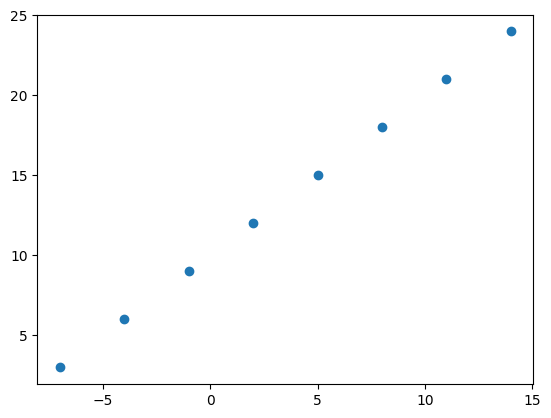

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# create features (X)
X = np.array([-7., -4., -1., 2., 5., 8.,11., 14.])

# create labels (y)
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

#visualize it
plt.scatter(X,y);

In [ ]:
y == X+10 # this is the relationship between our labels and features so (ind. var. and dep. var. )

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our Numpy array into tensors:
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

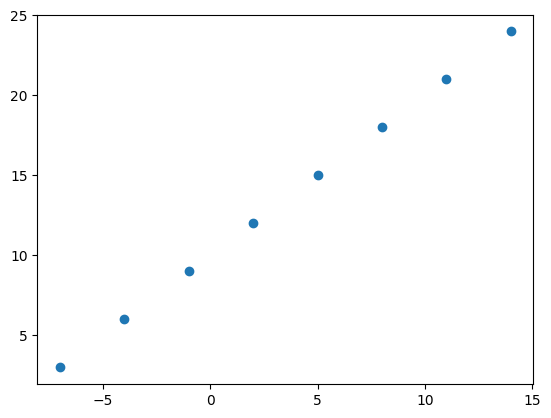

In [ ]:
plt.scatter(X,y);

## Steps in modeling with TensorFlow:

1. **Create a model** - define the input and output layers as well as the hiddern layers of a deep learning model.

2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interprert the performance of our model).

3. **Fitting a model** - letting the model try to find patternes between X & y (features and labels)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 here because we only want to predict one output from one input.

])

# 2. Compile the model (mae: compute the mean absolute error between the prediction and the labels)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #SGD stochastic Gradient Descent
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.7963 - mae: 17.7963
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 17.5150 - mae: 17.5150
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.2338 - mae: 17.2338
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 16.9525 - mae: 16.9525
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 16.6713 - mae: 16.6713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.3900 - mae: 16.3900
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 16.1088 - mae: 16.1088
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 15.8275 - mae: 15.8275
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.5463 - mae: 15.5463
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.2650 - mae: 15.2650
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.9838 - mae: 14.9838
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.7604 - mae: 14.7604
Epoch 13/100
1/1 ━━━━━━━━━

In [ ]:
# check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model

y_pred = model.predict(tf.constant([17.]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[29.479744]], dtype=float32)

## How can we improve our model ?

we can improve our model by altering the steps we took to create our model:

1. **Creating a model** here we might add more layers, increase the number of hidden units (all called neuros) within each of the hidden layers, change the actication function of each layer

2. ** Compiling a model** - Here we might change the optmization function of perhaps the **the learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it train for more steps) or give it more data.

In [ ]:
tf.random.set_seed(42)
# let rebuilt our model
#1. Create the model

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ["mae"]
              )
#3. Fit the model

model2.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.6583 - mae: 13.6583
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1488 - mae: 12.1488
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7506 - mae: 10.7506
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.4776 - mae: 9.4776
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8490 - mae: 7.8490
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.7434 - mae: 5.7434
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.9487 - mae: 3.9487
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.8578 - mae: 4.8578
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.4882 - mae: 5.4882
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.4599 - mae: 5.4599
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9603 - mae: 4.9603
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4.1723 - mae: 4.1723
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms

In [ ]:
y_preds = model2.predict(tf.constant([17.0]))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


array([[27.823824]], dtype=float32)

## Evaluating a model

In practive  typical workflow we'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> teak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluat it -> ...
```

when it comes to evaluation ... tere are three words we need to memorize:

"visualize, "visualize, "visualize"

it is a good idea to visualize:
* the data - what data are we working with, what does it look like ?
* the model itself - what does our model look like ?
* the training of a model - how does a model perfom while it learns ?
* the predictions of the model - how do the predictions of a model line up against the ground thruth (the orginal labels) ?

In [ ]:
# Make a biger data set :
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for this data set !
# remember we can create tensor by simple math operation !
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

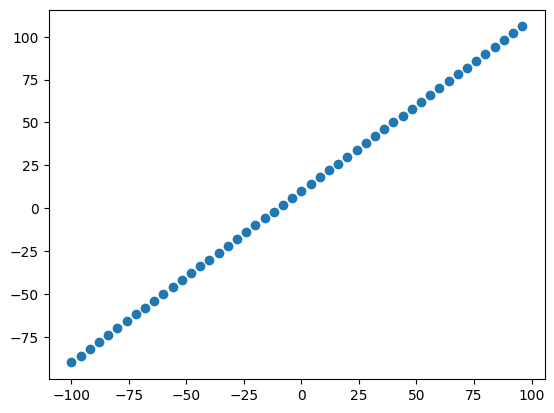

In [ ]:
# visualize the data:
import matplotlib.pyplot as plt
plt.scatter(X,y);

### the three sets:

we have:

- the training set: the model learn from this date (~70-80% of the total amount of data available)
- the validation set: the model is tuned (tweaking of the model) on this set (~10-15% of the data available)
- the test set: the model gets evaluated on this data to test what it has learned (~5-10% of the data available)

In [ ]:
# check the length of how many samples we have:
len(X)

50

In [ ]:
# split the data into train and test sets

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now that we'v got our data in training and test sets ... let's visualize it again

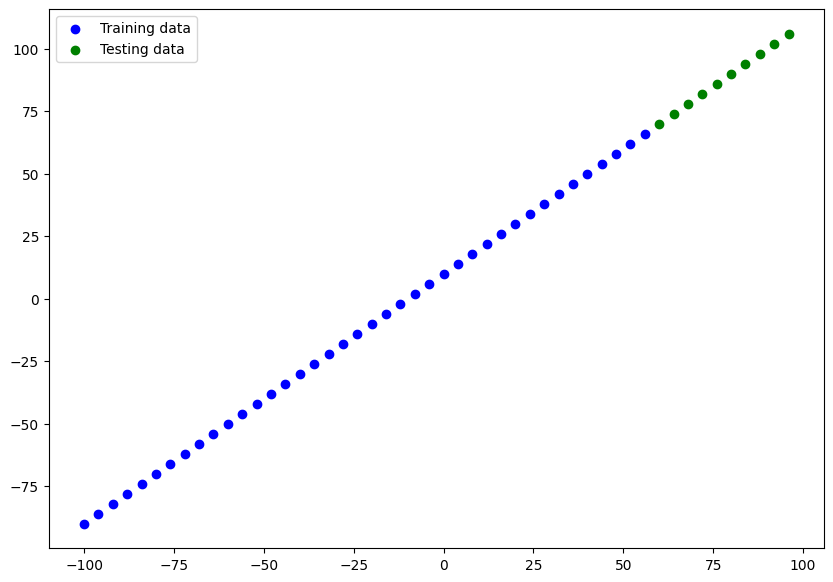

In [ ]:
plt.figure(figsize = (10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#plot test data in gree
plt.scatter(X_test, y_test, c="g", label=("Testing data"))

plt.legend()
plt.show()

So what we want at this point is for our model to be trained on the blue data and then we want to feed the x of the green data so it predict the green data.

In [ ]:
tf.random.set_seed(42)
# let's have a look at building a NN for our data

# 1. Create a model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 2. Compile the model
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. fit the model

#model3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

### Visualize the model

In [ ]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X[0].shape

TensorShape([])

In [ ]:
model4.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - loss: 29.0679 - mae: 29.0679
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7582 - mae: 9.7582  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.3812 - mae: 11.3812
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.3992 - mae: 8.3992
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8679 - mae: 9.8679 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5268 - mae: 11.5268 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5089 - mae: 8.5089 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9777 - mae: 9.9777   
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6724 - mae: 11.6724 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6187 - mae: 8.6187 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0874 - mae: 10.0874 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8180 - mae: 11.8180 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

In [ ]:
y_preds = model4.predict(tf.constant([17.]))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[20.621181]], dtype=float32)

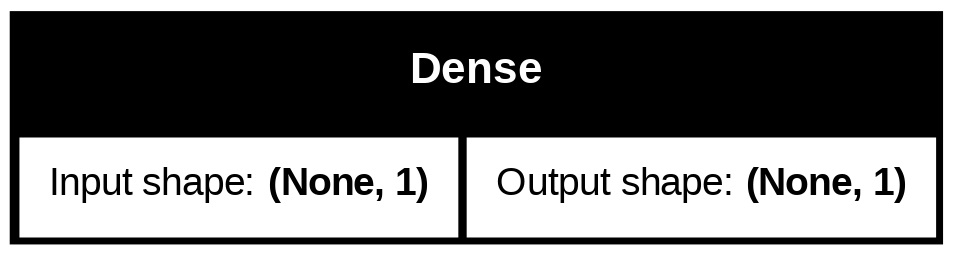

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)

### Visualize our model’s predictions

To visualize prediction, it is a good idea to plot them agains the ground truth lables

Often we will see this the form of `y_test` or `y_true` vs `y_pred` (ground truth versus our model’s prediction)

In [ ]:
#make some prediction
y_pred = model4.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[ 69.2284  ],
       [ 73.75    ],
       [ 78.2716  ],
       [ 82.793205],
       [ 87.314804],
       [ 91.83641 ],
       [ 96.35801 ],
       [100.87961 ],
       [105.401215],
       [109.92281 ]], dtype=float32)

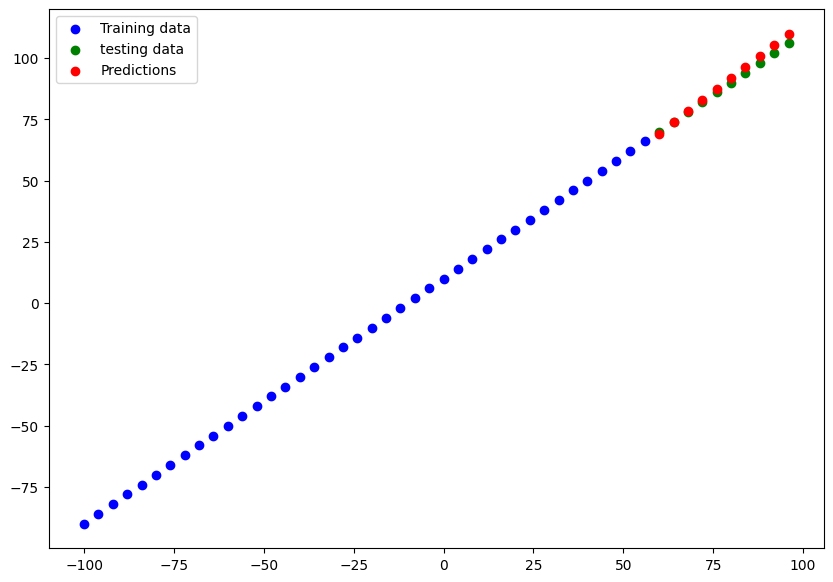

In [ ]:
def plot_prediction(train_data=X_train, train_labels=y_train,
										test_data=X_test, test_labels = y_test, predictions=y_pred):
										"""
										plot training data, test data and compare predictions to ground truth.
										"""
										plt.figure(figsize=(10,7))
										# plot training
										plt.scatter(train_data,train_labels, c="b", label="Training data")
										plt.scatter(test_data, test_labels, c="green", label="testing data")
										plt.scatter(test_data, predictions, c="red", label="Predictions")
										plt.legend();


plot_prediction()

### Evaluation metrics

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.7799263>

In [ ]:
y_test.shape

TensorShape([10])

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
# calculate the mean squared error
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.7270994>

In [ ]:
# make a function to reuse mae and mse
def mae_mse(y_true, y_pred, metric="mae"):
  """
  calculate mae by default or mse if specified
  """
  if metric == "mae":
    return tf.keras.losses.mae(y_true,tf.squeeze(y_pred))
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))



### Running experimentes to improve our model

1. Get more data - get more examples for your model to train on more opportunities (won't do here)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. train for longer - give our model a chance to look for longer after patterns.

let's do 3 modelling experiments:

1. `model_1`- same as original model, 1 layer + 100 epochs
2. `model_2`- two layers trained for 100 epochs
3. `model_3`- 2 layers trained for 500 epochs

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# model 1
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
#Make and plot prediction for model_1
y_mod_1_pred = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
y_mod_1_pred

array([[57.7585  ],
       [61.516357],
       [65.274216],
       [69.032074],
       [72.78993 ],
       [76.54779 ],
       [80.30565 ],
       [84.06351 ],
       [87.821365],
       [91.57922 ]], dtype=float32)

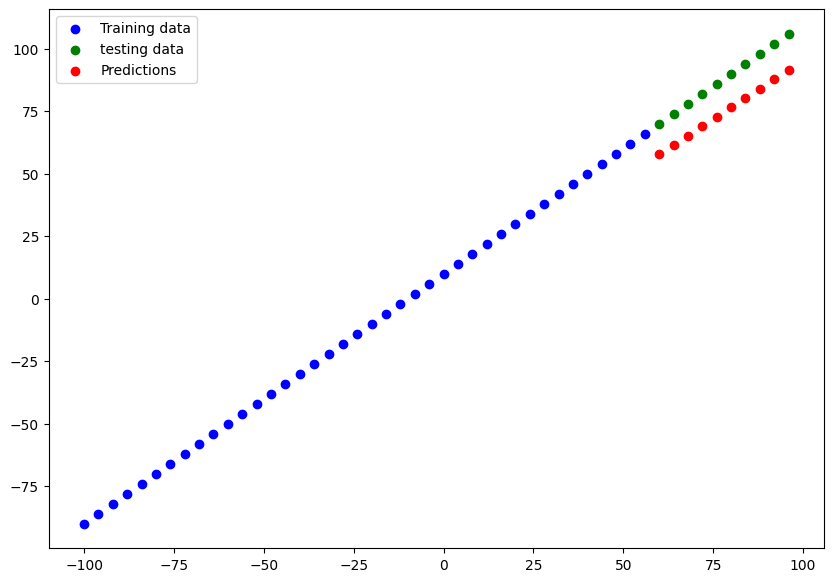

In [ ]:
plot_prediction(predictions=y_mod_1_pred)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae_mse(y_test, y_mod_1_pred)
mse_1 = mae_mse(y_test, y_mod_1_pred, "mse")

In [ ]:
tf.random.set_seed(42)
# Build model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


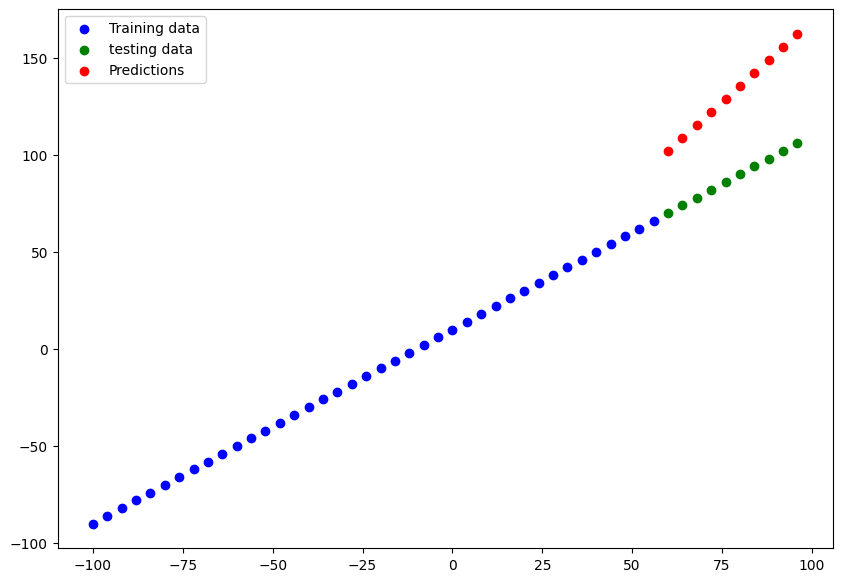

In [ ]:
y_mod_2_pred = model.predict(X_test)
plot_prediction(predictions=y_mod_2_pred)

In [ ]:
# calculate model_2 evaluation metrics
mae_2 = mae_mse(y_test, y_mod_2_pred)
mse_2 = mae_mse(y_test, y_mod_2_pred, "mse")

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
# Build model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_train, axis=-1), tf.expand_dims(y_train, axis=-1), epochs=10, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


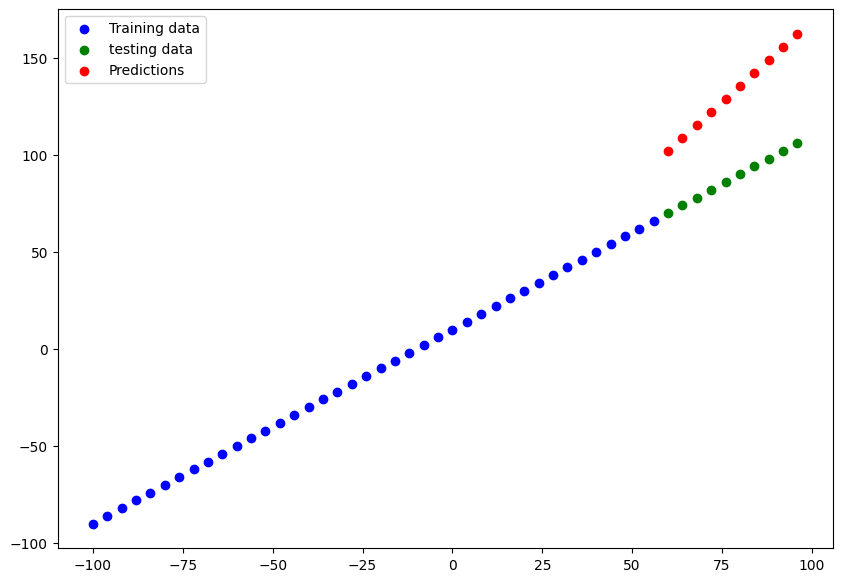

In [ ]:
y_mod_3_pred = model.predict(X_test)
plot_prediction(predictions=y_mod_3_pred)

In [ ]:
mae_3 = mae_mse(y_test, y_mod_3_pred)
mse_3 = mae_mse(y_test, y_mod_3_pred, "mse")

We are in the presence of an overfitting model.

**Note** we want to start with small epxeriement (small models) and then increase the scale !

In [ ]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd
model_results = [[mae_1.numpy(), mse_1.numpy()],
                 [mae_2.numpy(), mse_2.numpy()],
                 [mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Mae", "Mse"])
all_results

,Mae,Mse
0,13.331139,178.202972
1,44.039570,2000.755615
2,44.039570,2000.755615


## Tracking our experiments

One really good habit in ML modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us !

**Ressource** As you build more models, we can have a look at:

* TensorBoard - a component of the TensorFlow library to help us tracking experiments
* Weights & Biases - a tool for tracking all kinds of ML experiments

## Saving our models

Saving our models allows us to use them outside of Google colab (or wherever they were trained) such as in a Web application or a mobile app.

in TF there are two format:

- saved model format
- HDF5 format.

In [ ]:
# Save a modle using the SaveModel format
model_1.save("best_model_SavedModel_format.keras")

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
model_1.save('best_model_HDF5_format.h5')

In [ ]:
# Loading the saved model
saved_model_keras = tf.keras.models.load_model("best_model_SavedModel_format.keras")

In [ ]:
saved_model_keras.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
saved_model_hdf5 = tf.keras.models.load_model("best_model_HDF5_format.h5")
saved_model_hdf5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
y_pred_saved_hdf5 = saved_model_hdf5.predict(X_test)
y_pred_saved_hdf5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[57.7585  ],
       [61.516357],
       [65.274216],
       [69.032074],
       [72.78993 ],
       [76.54779 ],
       [80.30565 ],
       [84.06351 ],
       [87.821365],
       [91.57922 ]], dtype=float32)

In [ ]:
loss, acc = saved_model_hdf5.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 13.3311 - mean_absolute_error: 13.3311


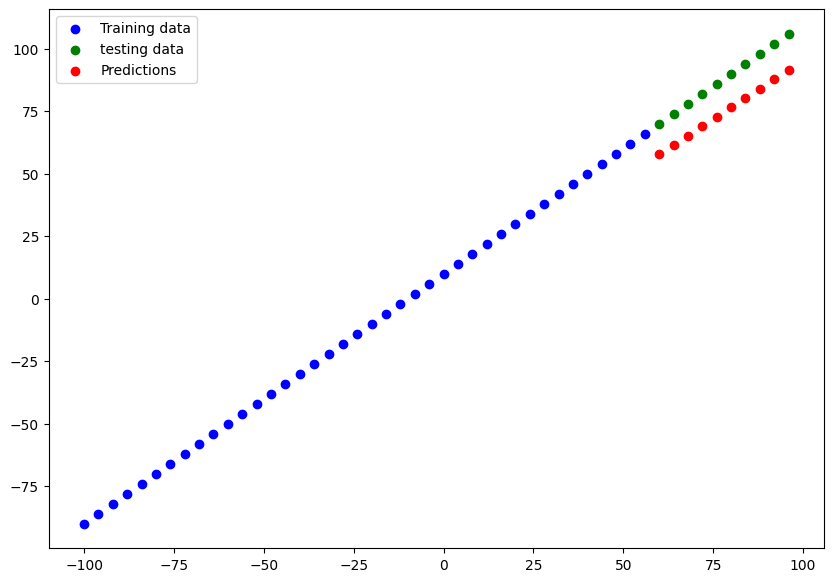

In [ ]:
plot_prediction(predictions=y_pred_saved_hdf5)

## Larger problem

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

### Prepare the data for ML

In [6]:
# one encode the non numerical categories
df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [8]:
# Create labels and features
X = df_one_hot.drop("charges", axis=1)
y = df_one_hot.charges
X.shape, y.shape

((1338, 11), (1338,))

In [9]:
# import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [10]:
tf.random.set_seed(42)

#1. Build the model
insurance_company = tf.keras.Sequential([
						tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
						tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_company.compile(loss=tf.keras.losses.mae,
													optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
													metrics=["mae"])

#3. Fit the model
history = insurance_company.fit(X_train, y_train, epochs=200, verbose=0)

In [11]:
# let's make a prediction !
insurance_company.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3457.9172 - mae: 3457.9172


[3398.86474609375, 3398.86474609375]

In [12]:
y_train.median()

9575.4421

In [13]:
history

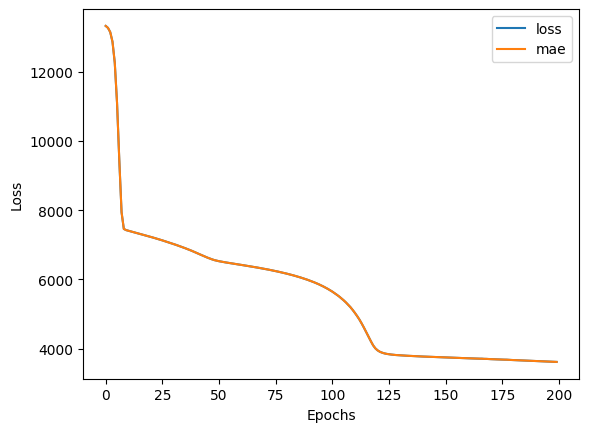

In [14]:
# plot history curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Preprocessing data (standardization and normalization)

In [15]:
# import
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
insurance.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

to prepare our data we can borrow a few classes from sklearn

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a columns transformer (because we are dealing with columns)
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [22]:
# Create our X and y
X = insurance.drop("charges", axis=1)
y = insurance.charges

# split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the columns transforer to our training data

ct.fit(X_train)

#Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [24]:
# What does our data look like now ?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [25]:
# Build a NN with our standadized data:
tf.random.set_seed(42)

#1. Create the model
insurance_model_n = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_n.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model

insurance_model_n.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [26]:
#evaluate (on the same type of date it was trained on !)
insurance_model_n.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3213.3701 - mae: 3213.3701


[3160.2841796875, 3160.2841796875]